<a href="https://colab.research.google.com/github/mcnica89/Intro_Probability_STAT1200/blob/main/BirthdayProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Birthday Problem

Imagine people enter a room one at a time in a random order. How many people need to enter the room until two people in the room have the same birthday? The number of people needed is a random number...how big is it typically?

In this notebook, we simulate* this processes many times to make histograms and compare to the theoretical answer.

\* We assume people are equally likely to be born on any day of the year, and that the people in the room are unrelated to each other (e.g. no twins)

In [1]:
# Import packages
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def simulate_birthday_problem(num_days_in_year = 365):
    '''Simulates the people entering a room and returns how many people are needed to repeat a birthday'''
    people = 0
    birthdays = set() # The peoples birthdays are stored as a "set" object in Python

    while True: #keep adding people in a loop until a repeat birthday is found
        new_birthday = random.randint(1, num_days_in_year)
        people += 1
        if new_birthday in birthdays: #repeat birthday found!
            return people
        else:
            birthdays.add(new_birthday)

In [3]:
print(f"It took {simulate_birthday_problem()} people until there was a repeat birthday!")

It took 40 people until there was a repeat birthday!


In [5]:
def plot_birthday_problem(num_sims = 1000,normed=False):
  # Simulate the birthday problem 1000 times and plot it in a histogram
  simulations = [simulate_birthday_problem() for _ in range(num_sims)]

  # Plot the histogram of the results
  plt.hist(simulations, bins=range(min(simulations), max(simulations) + 1), edgecolor='black', density=normed,label='Simulations')
  plt.title(f'Histogram of the Birthday Problem Simulated {num_sims} Times')
  plt.xlabel('Number of People')
  if normed==True:
      plt.ylabel('Frequency')
  if normed==False:
    plt.ylabel('Occurances')

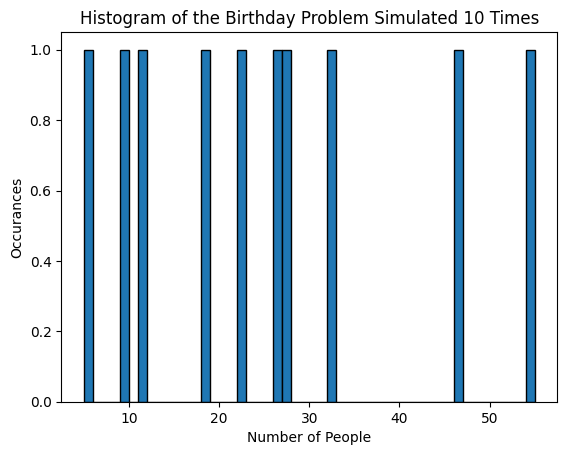

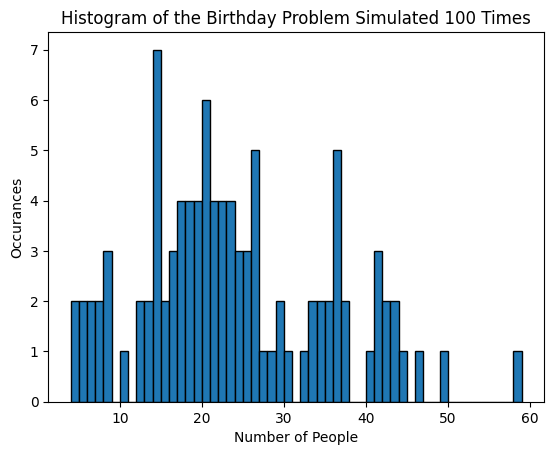

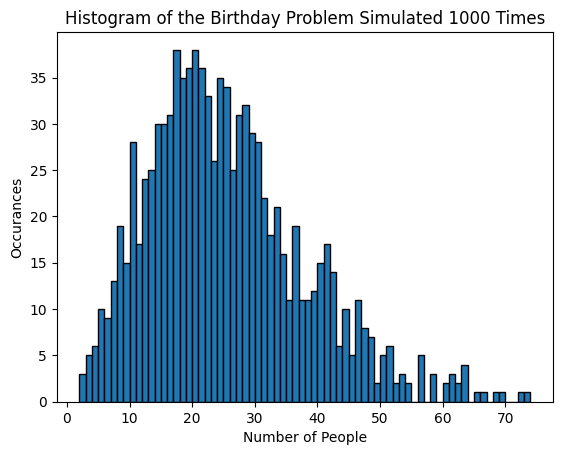

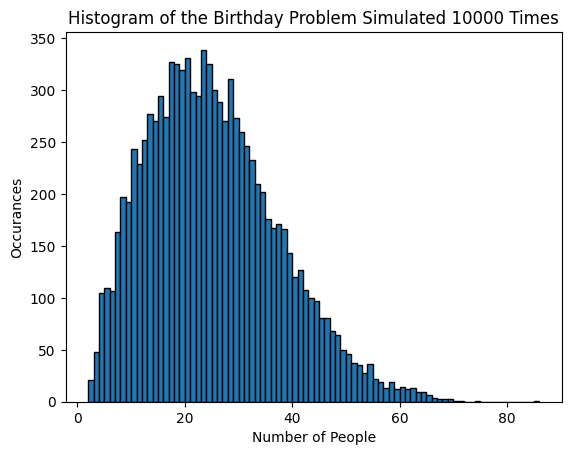

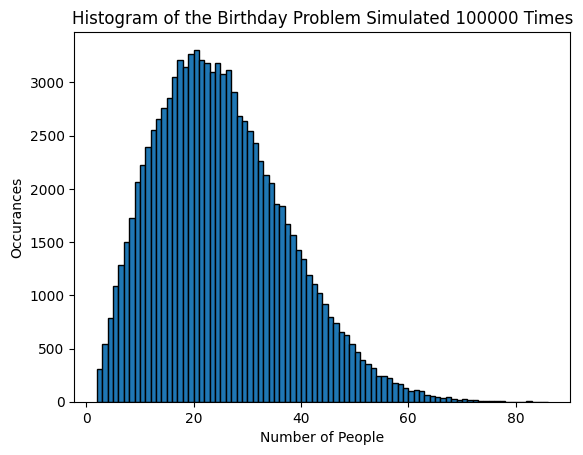

In [6]:
for n in [10,100,1_000,10_000,100_000]:
  plot_birthday_problem(n)
  plt.plot()
  plt.show()




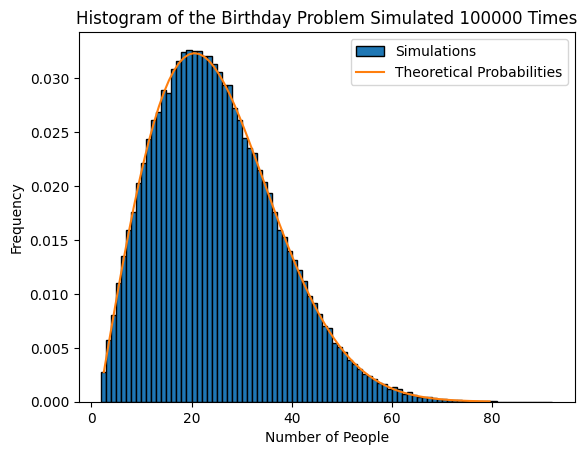

In [8]:
def plot_birthday_problem_theoretical():
  n=np.arange(2,80)
  prob_less_or_equal_n = 1 - np.cumprod( (365 - (n-1))/365 ) #does the product formula from the book.
  prob_exactly_equal_n = np.diff(prob_less_or_equal_n,prepend=0) #take the difference of less or equal n to get the exactly n probability

  #y=x**2/80**2/10
  plt.plot(n+0.5,prob_exactly_equal_n,label='Theoretical Probabilities') #+0.5 centers the line on the middle of the histogram

plot_birthday_problem(100000,True)
plot_birthday_problem_theoretical()
plt.legend()
plt.show()